In [2]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv("all_data.csv")

In [4]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.describe(include="all")

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [6]:
df = df.rename(columns = {"Life expectancy at birth (years)" : "life_expectancy"})

In [7]:
df.dtypes

Country             object
Year                 int64
life_expectancy    float64
GDP                float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [9]:
model= sm.OLS.from_formula('GDP~life_expectancy', data=df).fit()
print(model.params)

Intercept         -8.285365e+12
life_expectancy    1.671374e+11
dtype: float64


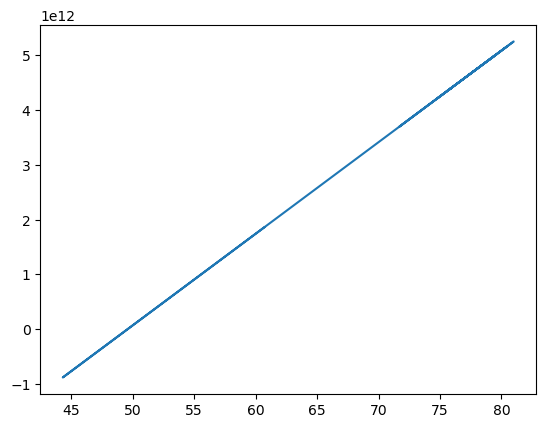

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(df.life_expectancy, df.life_expectancy*model.params[1] + model.params[0])
plt.show()
plt.clf()

In [11]:
germany = df[df.Country == "Germany"]

In [12]:
germany.head()

,Country,Year,life_expectancy,GDP
32,Germany,2000,78.0,1.949950e+12
33,Germany,2001,78.3,1.950650e+12
34,Germany,2002,78.4,2.079140e+12
35,Germany,2003,78.5,2.505730e+12
36,Germany,2004,79.1,2.819250e+12


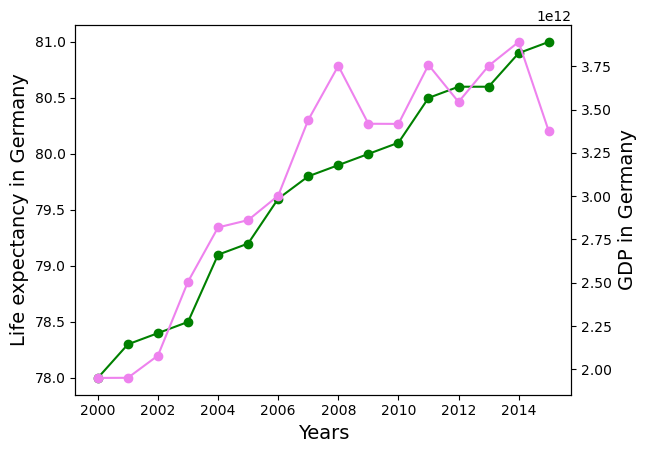

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots()
ax.plot(germany.Year, germany.life_expectancy, color="green", marker="o")
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("Life expectancy in Germany", fontsize=14)
ax2 = ax.twinx()
ax2.plot(germany.Year, germany.GDP, color="violet", marker="o")
ax2.set_ylabel("GDP in Germany", fontsize=14)
fig.savefig('life_expectancy_and_GDP_in_Germany.jpg',
           format='jpeg',
           dpi=100,
           bbox_inches='tight')
plt.show()
plt.clf()

In [14]:
GDP_le_corr_germany = stats.pearsonr(germany.life_expectancy, germany.GDP)
GDP_le_corr_germany

PearsonRResult(statistic=0.932698898256127, pvalue=1.401881553404576e-07)

Based on Germany's example we can see great linear coorelation between life expectancy and GDP let's see how it looks like with other countries

In [15]:
all_countries = df.groupby('Year')[['GDP','life_expectancy']].mean().reset_index()

In [16]:
all_countries.head()

,Year,GDP,life_expectancy
0,2000,2.371583e+12,70.766667
1,2001,2.448752e+12,70.833333
2,2002,2.561221e+12,70.950000
3,2003,2.743446e+12,71.033333
4,2004,2.991647e+12,71.300000


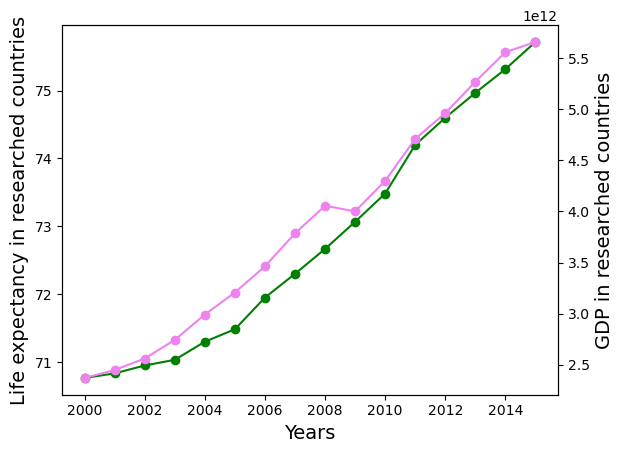

<Figure size 640x480 with 0 Axes>

In [17]:
fig, ax = plt.subplots()
ax.plot(all_countries.Year, all_countries.life_expectancy, color="green", marker="o")
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("Life expectancy in researched countries", fontsize=14)
ax2 = ax.twinx()
ax2.plot(all_countries.Year, all_countries.GDP, color="violet", marker="o")
ax2.set_ylabel("GDP in researched countries", fontsize=14)
fig.savefig('life_expectancy_and_GDP_in_all_countries.jpg',
           format='jpeg',
           dpi=100,
           bbox_inches='tight')
plt.show()
plt.clf()

In [18]:
GDP_le_corr_all_countries, pval = stats.pearsonr(all_countries.life_expectancy, all_countries.GDP)
GDP_le_corr_all_countries

0.992421702083911

We can see a strong coorelation between the gdp and life_expectancy between all of the countries.

In [19]:
country_list = df["Country"].unique().tolist()
country_list
country_list.index("Germany")

2

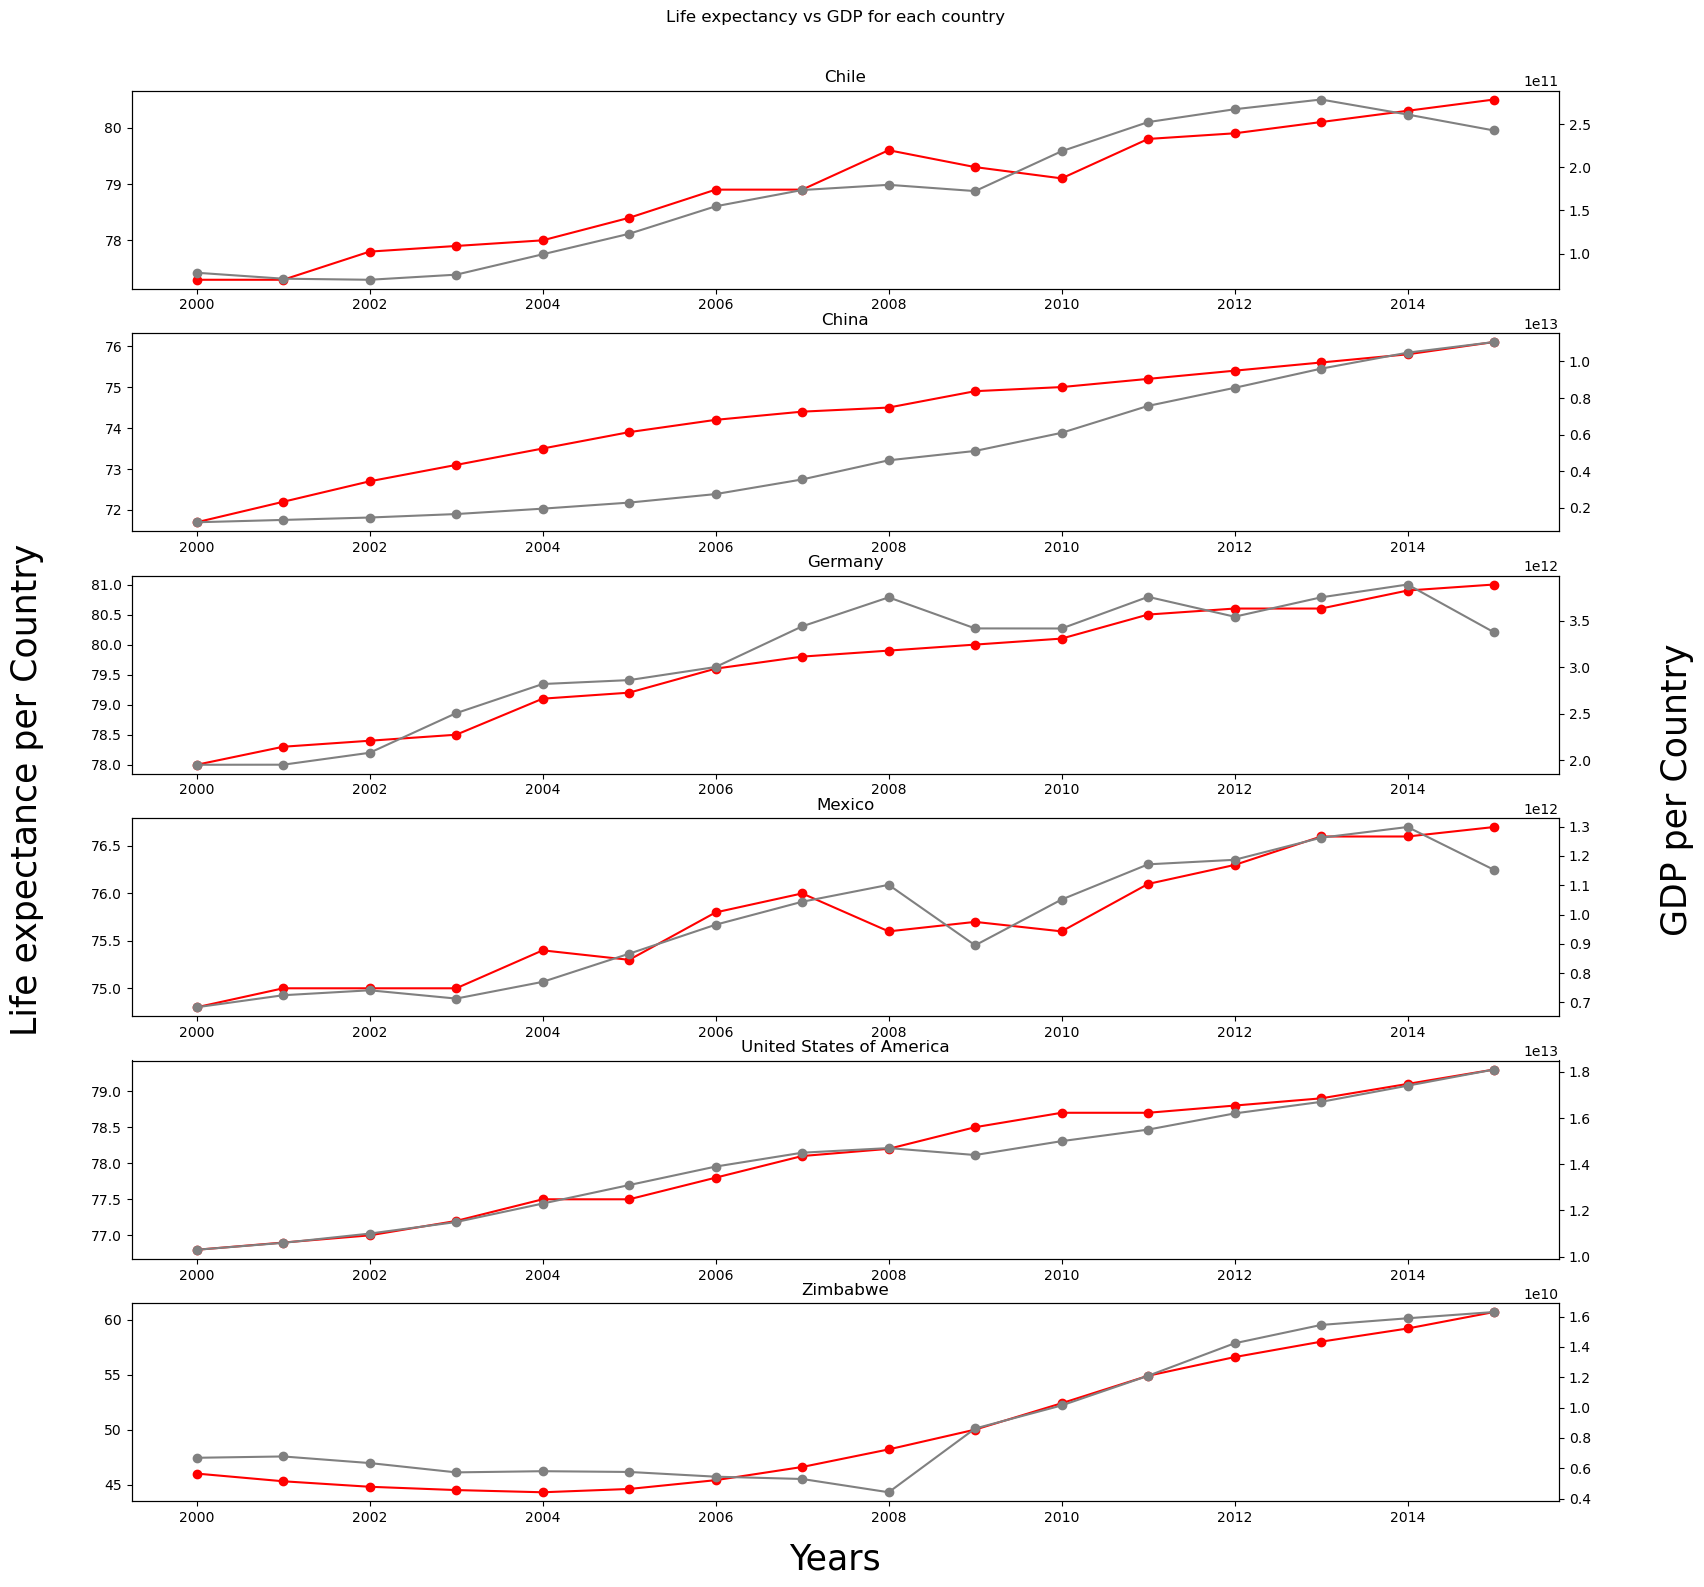

<Figure size 640x480 with 0 Axes>

In [36]:
fig, ax = plt.subplots(len(country_list))
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Life expectancy vs GDP for each country", y=1.02)
fig.tight_layout()
fig.text(0.5, -0.02, "Years", fontsize = 25, ha ="center")
fig.text(-0.05, 0.5, "Life expectance per Country", fontsize = 25, rotation = "vertical", va = "center")
fig.text(1.05, 0.5, "GDP per Country", fontsize = 25, rotation = "vertical", va = "center")
for i in range(len(country_list)):
    name = country_list[i]
    small_df = df[df.Country == name]
    ax[i].set_title(name)
    ax[i].plot(small_df.Year, small_df.life_expectancy, color="red", marker="o")
    ax2 = ax[i].twinx()
    ax2.plot(small_df.Year, small_df.GDP, color="grey", marker="o")
fig.savefig('life_expectancy_and_GDP_for_each_country.jpg',
           format='jpeg',
           dpi=100,
           bbox_inches='tight')
plt
plt.show()
plt.clf()